<a href="https://colab.research.google.com/github/GuzVenegas/TelecomX_parte2/blob/main/TelecomX_SegundaParte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom segunda parte: Previsión de cancelación en las suscripciones**

#**Descripción del proyecto:**
Desarrollo de modelos predictivos capaces de preveer que clientes tienen mayor probabilidad de cancelar sus suscripciones.

#**Objetivos:**
- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

- Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#1. Preparar los datos para el modelado

##1.1. Importando y conociendo los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Importando datos
datos = pd.read_csv('/content/df_limpo.csv')


In [3]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [4]:
datos.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [5]:
# Cambiar el nombre de las columnas
datos.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'cancelacion',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'adulto_mayor',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'antiguedad_meses',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_multiples',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_en_linea',
    'internet.OnlineBackup': 'respaldo_en_linea',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'facturacion_electronica',
    'account.PaymentMethod': 'metodo_pago',
    'Total.Day': 'total_dia',
    'account.Charges.Monthly': 'cargo_mensual',
    'account.Charges.Total': 'cargo_total'
}, inplace=True)

In [6]:
datos.drop('id_cliente', axis=1, inplace=True)
datos.head()

,cancelacion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,total_dia,cargo_mensual,cargo_total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cancelacion              7043 non-null   object 
 1   genero                   7043 non-null   object 
 2   adulto_mayor             7043 non-null   int64  
 3   tiene_pareja             7043 non-null   object 
 4   tiene_dependientes       7043 non-null   object 
 5   antiguedad_meses         7043 non-null   int64  
 6   servicio_telefonico      7043 non-null   object 
 7   lineas_multiples         7043 non-null   object 
 8   servicio_internet        7043 non-null   object 
 9   seguridad_en_linea       7043 non-null   object 
 10  respaldo_en_linea        7043 non-null   object 
 11  proteccion_dispositivo   7043 non-null   object 
 12  soporte_tecnico          7043 non-null   object 
 13  streaming_tv             7043 non-null   object 
 14  streaming_peliculas     

In [8]:
datos['adulto_mayor'] = datos['adulto_mayor'].map({0: 'Yes', 1: 'No'})

In [9]:
datos.describe(include='object')

,cancelacion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,Yes,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [10]:
categoricas = pd.DataFrame(datos.describe(include='object'))
categoricas.columns

Index(['cancelacion', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'servicio_telefonico', 'lineas_multiples',
       'servicio_internet', 'seguridad_en_linea', 'respaldo_en_linea',
       'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv',
       'streaming_peliculas', 'tipo_contrato', 'facturacion_electronica',
       'metodo_pago'],
      dtype='object')

##1.2. Visualización de las variables categóricas sobre estatus socioeconómico de los usuarios.
En este caso se hara una evaluación de las variables:
- adulto_mayor
- genero
- tiene_pareja
- tiene_dependientes
- servicio_telefonico




In [11]:
px.histogram(datos,x='genero',text_auto=True,color='cancelacion',barmode='group')

In [12]:
px.histogram(datos,x='tiene_pareja',text_auto=True,color='cancelacion',barmode='group')

In [13]:
px.histogram(datos,x='tiene_dependientes',text_auto=True,color='cancelacion',barmode='group')

In [14]:
#Se aplico el método crosstab para conocer la relevancia de la variabla 'servicio_telefonico' frente a la cancelación
pd.crosstab(datos['servicio_telefonico'], datos['cancelacion'], normalize='columns').round(2)*100

cancelacion,No,Yes
servicio_telefonico,,
No,10.0,9.0
Yes,90.0,91.0


In [15]:
px.histogram(datos,x='servicio_telefonico',text_auto=True,color='cancelacion',barmode='group')

In [16]:
datos['adulto_mayor'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
#Se modificaron las etiquetas de la columna adulto mayor, si adulto mayor = 1, no adulto mayor = 0
datos['adulto_mayor'] = datos['adulto_mayor'].apply(lambda x: 'Yes' if x == 'No' else 'No')

In [18]:
datos['adulto_mayor'].value_counts(normalize=True).round(2)*100

,proportion
adulto_mayor,
No,84.0
Yes,16.0


In [19]:
px.histogram(datos,x='adulto_mayor',text_auto=True,color='cancelacion',barmode='group')

##1.3. Visualización de las variables cuantitativas sobre estatus socioeconómico de los usuarios.
En este caso se hara una evaluación de las variables:
- antiguedad_meses
- total_dia
- cargo_mensual
- cargo_total

In [20]:
datos.describe()

,antiguedad_meses,total_dia,cargo_mensual,cargo_total
count,7043.000000,7032.000000,7043.000000,7032.000000
mean,32.371149,2.159879,64.761692,2283.300441
std,24.559481,1.006217,30.090047,2266.771362
min,0.000000,0.460000,18.250000,18.800000
25%,9.000000,1.207500,35.500000,401.450000
50%,29.000000,2.350000,70.350000,1397.475000
75%,55.000000,3.010000,89.850000,3794.737500
max,72.000000,4.050000,118.750000,8684.800000


In [21]:
v_cuantitativas = pd.DataFrame(datos.describe())

In [22]:
px.box(datos, x='antiguedad_meses',color='cancelacion')

In [23]:
px.box(datos, x='total_dia',color='cancelacion')

In [24]:
px.box(datos, x='cargo_mensual',color='cancelacion')

In [25]:
px.box(datos, x='cargo_total',color='cancelacion')

##1.4. Eliminación de columnas irrlevantes
De acuerdo a un primer análisis, se optó por retirar la columna id_custumer y la columna servicio_telefónico.

Para el primer caso, es un poco obvio que la identificación de los usuarios no cobra relevancia en la modelación.

Para el segundo aspecto, aunque un poco obvio, de igual manera, revisamos mediante visualización de datos y el análisis del método crosstab y se llego a la conclusión que esta variable, tampoco aporta al modelo.
En líneas generales, conviene recordar que esta variable podría entenderse como los usuarios que cuentan o no con servicio telefónico. Esto a simple vista muestra una inconsistencia.

In [26]:
datos.drop('servicio_telefonico', axis=1, inplace=True)
datos.head()

,cancelacion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,lineas_multiples,servicio_internet,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,total_dia,cargo_mensual,cargo_total
0,No,Female,No,Yes,Yes,9,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,No,No,No,9,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,No,No,No,4,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,Yes,Yes,No,13,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,Yes,Yes,No,3,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


# 2. Realizar análisis de correlación y selección de variables



##2.1. Problema de multicolinealidad (Agrupación de categorías):

Durante la mentoría se hizo la observación de que en las variables categóricas presentaban un problema, ya que se componían de las siguientes tres categorías:

"Yes" → cliente usa el servicio.

"No" → cliente tiene internet, pero no contrató el servicio.

"No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio.

Esta situación provocaba mlticolinealidad perfecta al transofrmar estas varibales a dummies producia:

Creaba correlación 1.0 entre variables.
Generaba VIF infinito.
Comprometía la estabilidad y el rendimiento de los modelos.


Para su corrección se agruparon las categorías "No internet service" como "No" en las colmnas:

seguridad_en_linea      

respaldo_en_linea       

proteccion_dispositivo  

soporte_tecnico         

streaming_tv            

streaming_peliculas     



In [27]:
#Copia de la base de datos
datos_clean = datos.copy()

# Agrupar "No internet service" como "No"
cols_to_fix = [
    'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']

for col in cols_to_fix:
    datos_clean[col] = datos_clean[col].replace('No internet service', 'No')



##2.2. Codificación de las variables categóricas:

- Para este proceso se aplico codificación OneHotEncoding mediante el método pd.getdummies
- Aicionalmente, se comprobo que en las columnas no existan valuores null y en caso de existir se retiraron.

In [28]:
# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = ['cancelacion', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'lineas_multiples', 'servicio_internet',
       'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
       'soporte_tecnico', 'streaming_tv', 'streaming_peliculas',
       'tipo_contrato', 'facturacion_electronica', 'metodo_pago']

df_encoded = pd.get_dummies(datos_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,antiguedad_meses,total_dia,cargo_mensual,cargo_total,cancelacion_Yes,genero_Male,adulto_mayor_Yes,tiene_pareja_Yes,tiene_dependientes_Yes,lineas_multiples_No phone service,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,9,2.20,65.60,593.30,False,False,False,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,9,2.01,59.90,542.40,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,4,2.34,73.90,280.85,True,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
3,13,3.17,98.00,1237.85,True,True,True,True,False,False,...,True,False,True,True,False,False,True,False,True,False
4,3,2.97,83.90,267.40,True,False,True,True,False,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,13,1.90,55.15,742.90,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
7039,22,2.84,85.10,1873.70,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
7040,2,1.55,50.30,92.75,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
7041,67,2.30,67.85,4627.65,False,True,False,True,True,False,...,True,True,False,True,False,True,False,False,False,True


In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   antiguedad_meses                     7043 non-null   int64  
 1   total_dia                            7032 non-null   float64
 2   cargo_mensual                        7043 non-null   float64
 3   cargo_total                          7032 non-null   float64
 4   cancelacion_Yes                      7043 non-null   bool   
 5   genero_Male                          7043 non-null   bool   
 6   adulto_mayor_Yes                     7043 non-null   bool   
 7   tiene_pareja_Yes                     7043 non-null   bool   
 8   tiene_dependientes_Yes               7043 non-null   bool   
 9   lineas_multiples_No phone service    7043 non-null   bool   
 10  lineas_multiples_Yes                 7043 non-null   bool   
 11  servicio_internet_Fiber optic 

In [30]:
df_encoded.describe(include='bool')

,cancelacion_Yes,genero_Male,adulto_mayor_Yes,tiene_pareja_Yes,tiene_dependientes_Yes,lineas_multiples_No phone service,lineas_multiples_Yes,servicio_internet_Fiber optic,servicio_internet_No,seguridad_en_linea_Yes,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
freq,5174,3555,5901,3641,4933,6361,4072,3947,5517,5024,...,4621,4999,4336,4311,5570,5348,4171,5521,4678,5431


Modificar los valores nulos en las columnas.
Se pueden retirar o cambiar a valores 0

In [31]:
#Visualizar los valores nulos en df_encoded
df_encoded.isnull().sum()

,0
antiguedad_meses,0
total_dia,11
cargo_mensual,0
cargo_total,11
cancelacion_Yes,0
genero_Male,0
adulto_mayor_Yes,0
tiene_pareja_Yes,0
tiene_dependientes_Yes,0
lineas_multiples_No phone service,0


In [32]:
#Retirando los valores nulos
df_encoded = df_encoded.dropna(subset=['total_dia','cargo_total'])

In [33]:
#Visualizar los valores nulos en df_encoded
df_encoded.isnull().sum()

,0
antiguedad_meses,0
total_dia,0
cargo_mensual,0
cargo_total,0
cancelacion_Yes,0
genero_Male,0
adulto_mayor_Yes,0
tiene_pareja_Yes,0
tiene_dependientes_Yes,0
lineas_multiples_No phone service,0


##2.3. Análisis de correlación:


In [34]:
datos_corr = df_encoded.corr()
datos_corr

,antiguedad_meses,total_dia,cargo_mensual,cargo_total,cancelacion_Yes,genero_Male,adulto_mayor_Yes,tiene_pareja_Yes,tiene_dependientes_Yes,lineas_multiples_No phone service,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
antiguedad_meses,1.000000,0.246210,0.246862,0.825880,-0.354049,0.005285,0.015683,0.381912,0.163386,-0.007877,...,0.361520,0.325288,0.280264,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
total_dia,0.246210,1.000000,0.996227,0.650921,0.192030,-0.014477,0.217622,0.097159,-0.112514,-0.247900,...,0.481736,0.338021,0.626474,0.626058,0.005252,-0.072454,0.349467,0.029974,0.270270,-0.374906
cargo_mensual,0.246862,0.996227,1.000000,0.651065,0.192858,-0.013779,0.219874,0.097825,-0.112343,-0.248033,...,0.482607,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
cargo_total,0.825880,0.650921,0.651065,1.000000,-0.199484,0.000048,0.102411,0.319072,0.064653,-0.113008,...,0.522881,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
cancelacion_Yes,-0.354049,0.192030,0.192858,-0.199484,1.000000,-0.008545,0.150541,-0.149982,-0.163128,-0.011691,...,-0.066193,-0.164716,0.063254,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
genero_Male,0.005285,-0.014477,-0.013779,0.000048,-0.008545,1.000000,-0.001819,-0.001379,0.010349,0.007515,...,-0.000807,-0.008507,-0.007124,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
adulto_mayor_Yes,0.015683,0.217622,0.219874,0.102411,0.150541,-0.001819,1.000000,0.016957,-0.210550,-0.008392,...,0.059514,-0.060577,0.105445,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
tiene_pareja_Yes,0.381912,0.097159,0.097825,0.319072,-0.149982,-0.001379,0.016957,1.000000,0.452269,-0.018397,...,0.153556,0.120206,0.124483,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
tiene_dependientes_Yes,0.163386,-0.112514,-0.112343,0.064653,-0.163128,0.010349,-0.210550,0.452269,1.000000,0.001078,...,0.013900,0.063053,-0.016499,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
lineas_multiples_No phone service,-0.007877,-0.247900,-0.248033,-0.113008,-0.011691,0.007515,-0.008392,-0.018397,0.001078,1.000000,...,0.070076,0.095138,0.021383,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463


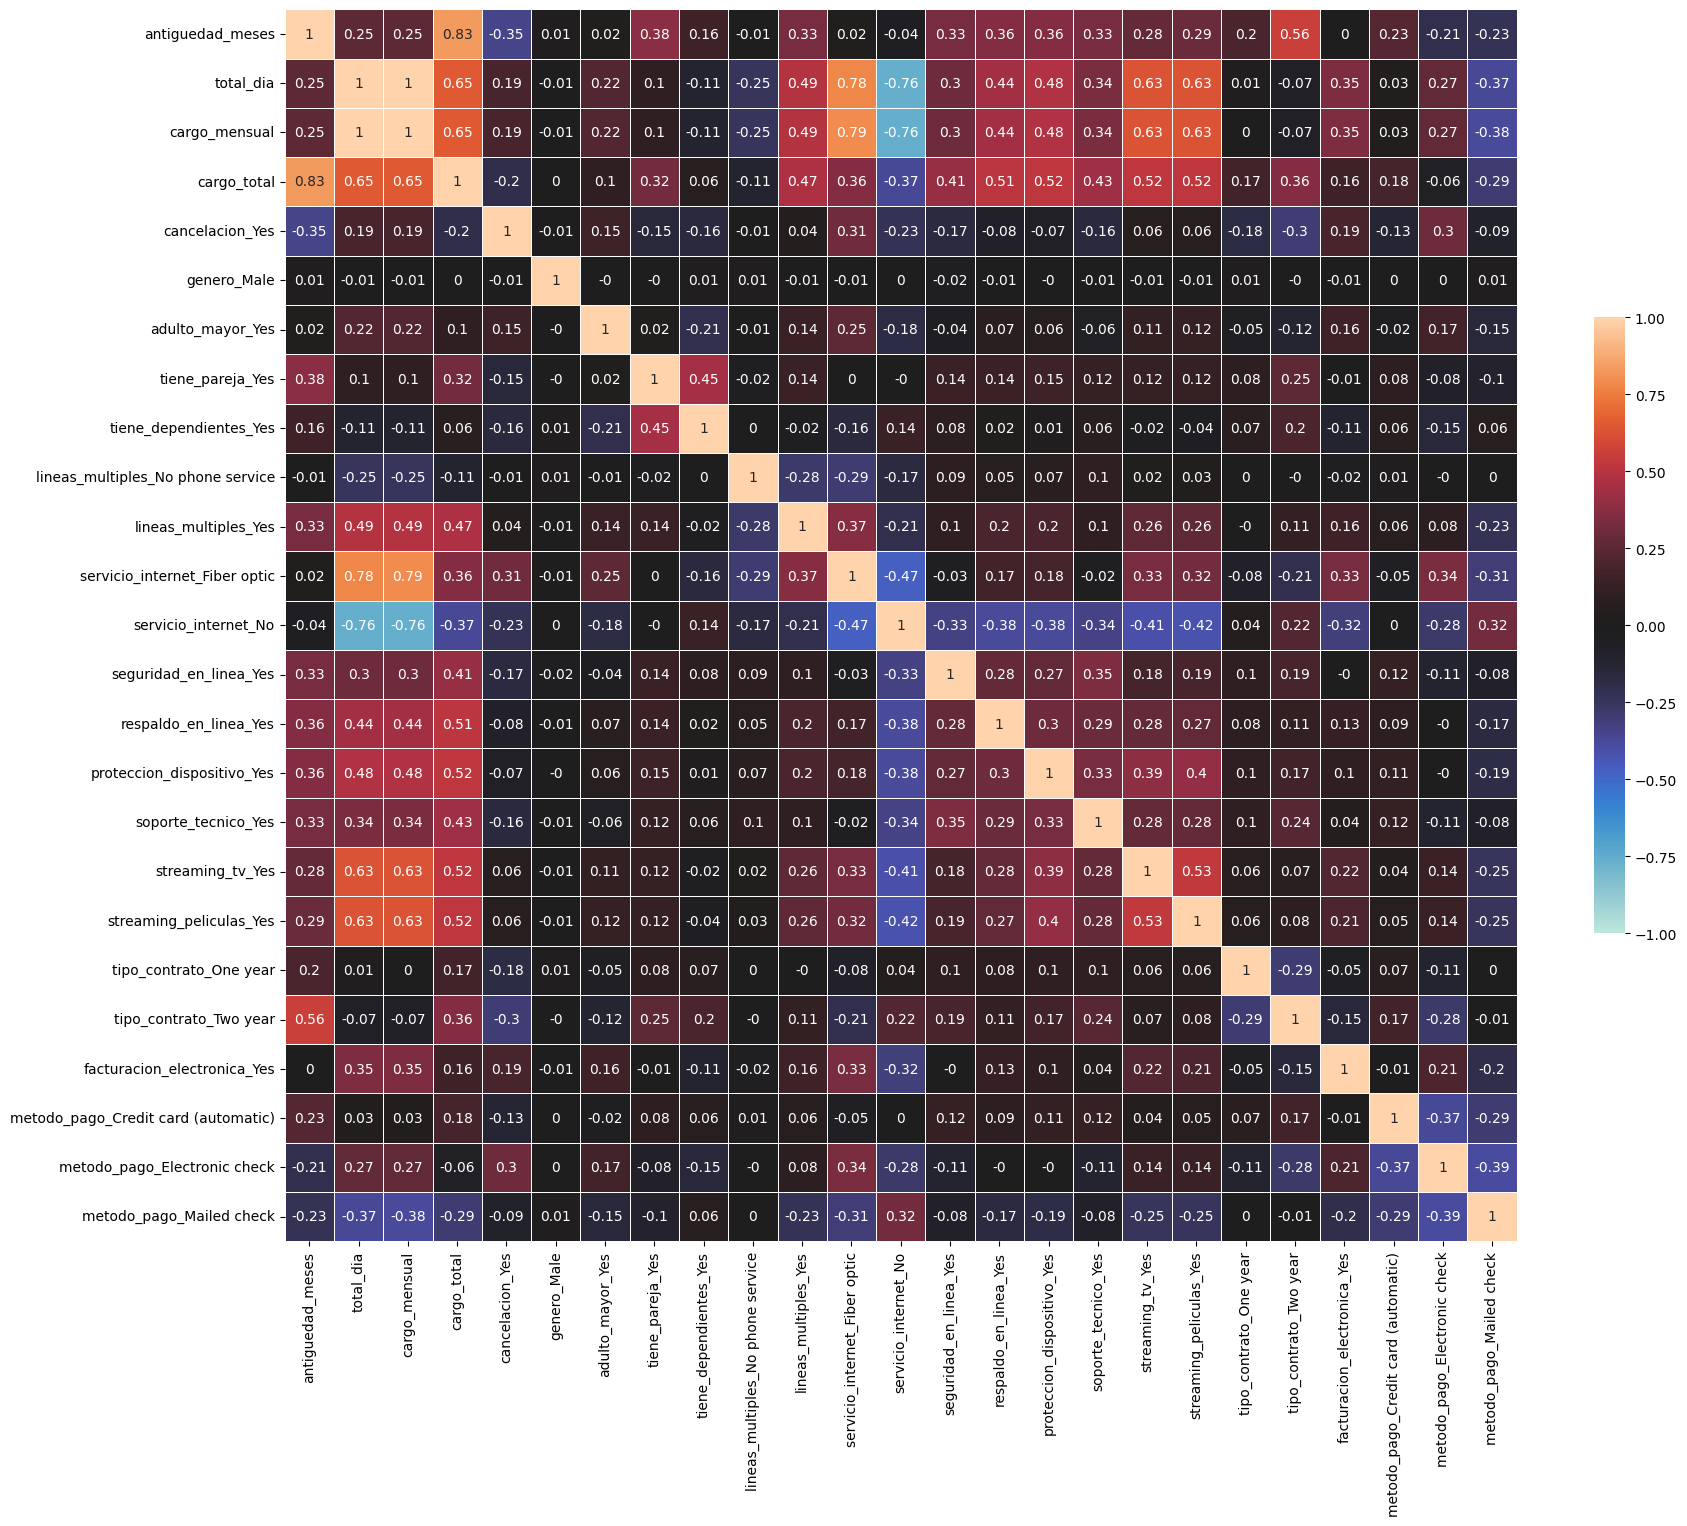

In [35]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(datos_corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

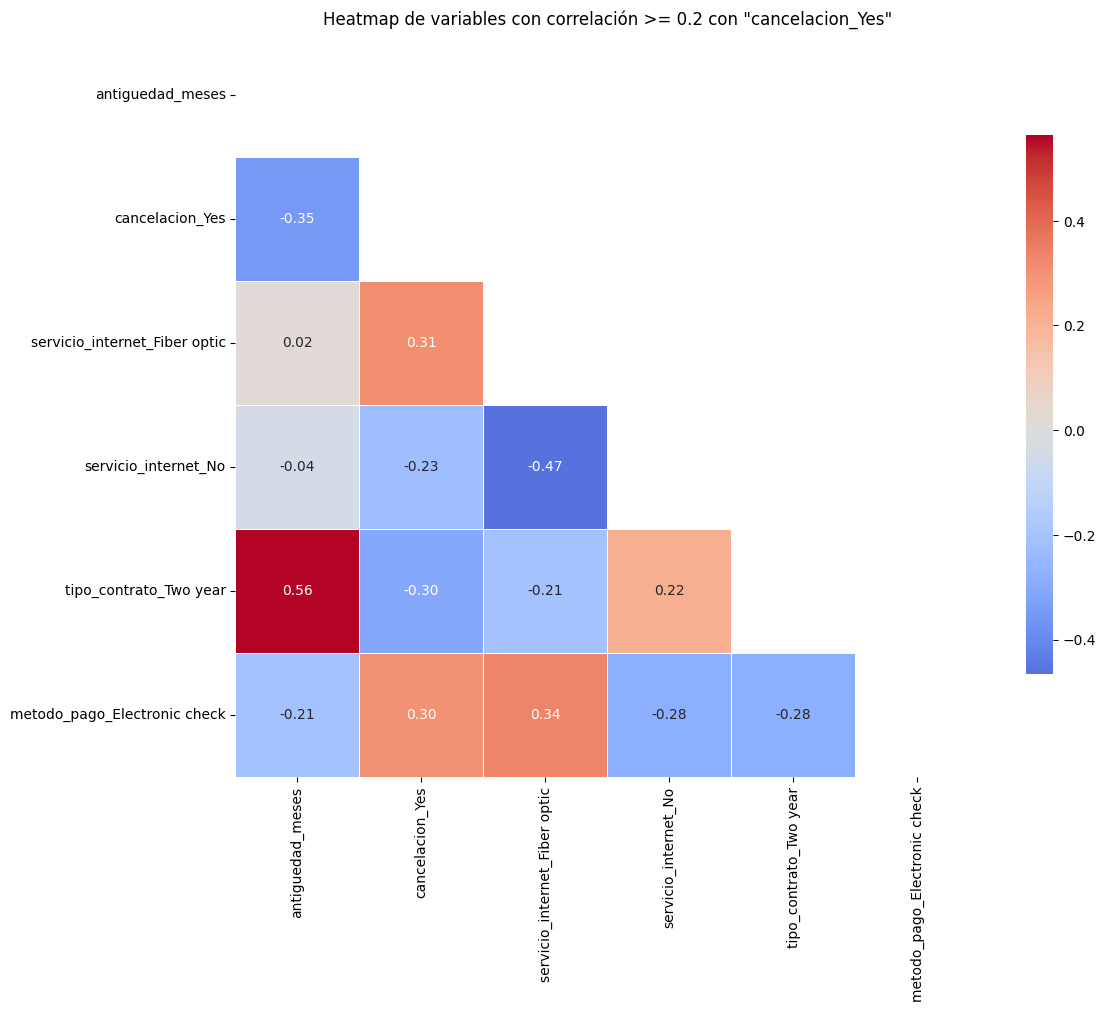

In [36]:
# Definir la variable objetivo
target_var = 'cancelacion_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = datos_corr.index[abs(datos_corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = datos_corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

##2.4. Análisis de VIF (Multicolinearidad):
Realiza una regresión lineal sobre cada una de las variables y mide si cada una de las varibales consideradas como varibales objetivo puede ser explicada por las demás variables. En este análisis se descarta la variable target original, en este caso la variable 'cancelación_Yes'

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [38]:
X = df_encoded.drop('cancelacion_Yes', axis=1)
X_const = add_constant(X)

In [39]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,1963.648607
3,cargo_mensual,992.623632
11,servicio_internet_Fiber optic,148.504277
2,total_dia,133.792125
12,servicio_internet_No,104.217179
9,lineas_multiples_No phone service,34.895768
18,streaming_peliculas_Yes,24.158588
17,streaming_tv_Yes,24.080021
4,cargo_total,10.871350
1,antiguedad_meses,7.613525


##2.5 Estandarización de los datos mediante el método de logarítmos:
**No fue favorable**

Dado que en el análisis VIF nos mostró problemas de multicolinealidad en muchas de las varibales, se decició aplicar un análisis a varibles numéricas para revisar si hay outliers y ver si estos son convenientes de tratar.


In [40]:
df_encoded.describe()

,antiguedad_meses,total_dia,cargo_mensual,cargo_total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,2.159879,64.798208,2283.300441
std,24.545260,1.006217,30.085974,2266.771362
min,1.000000,0.460000,18.250000,18.800000
25%,9.000000,1.207500,35.587500,401.450000
50%,29.000000,2.350000,70.350000,1397.475000
75%,55.000000,3.010000,89.862500,3794.737500
max,72.000000,4.050000,118.750000,8684.800000


In [41]:
from scipy.stats import iqr
iqr_am = iqr(df_encoded['antiguedad_meses'])
iqr_am

np.float64(46.0)

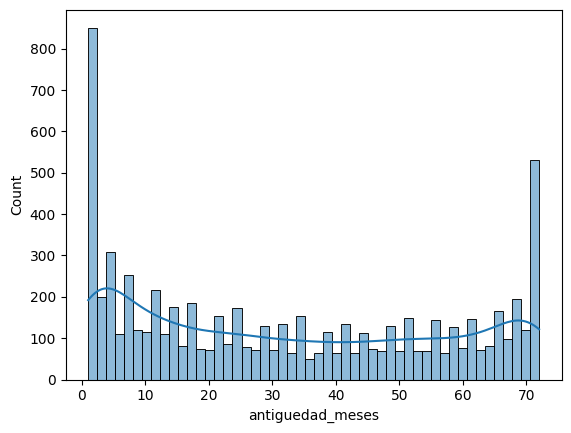

In [42]:
sns.histplot(df_encoded['antiguedad_meses'], bins=50, kde=True);

In [43]:
px.box(df_encoded, x='antiguedad_meses')

In [44]:
from scipy.stats import iqr
iqr_ct = iqr(df_encoded['cargo_total'])
iqr_ct

np.float64(3393.2875000000004)

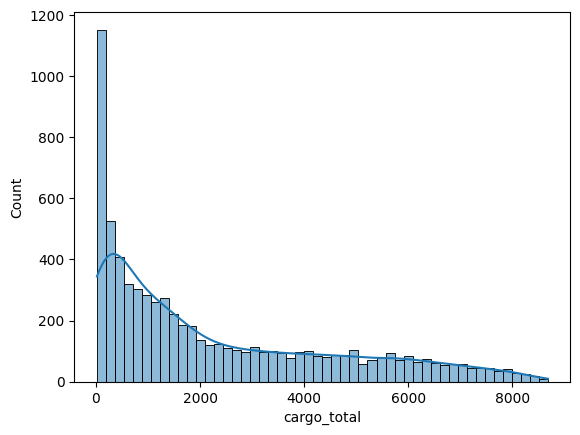

In [45]:
import seaborn as sns
sns.histplot(df_encoded['cargo_total'], bins=50, kde=True);

In [46]:
px.box(df_encoded, x='cargo_total')

In [47]:
from scipy.stats import iqr
iqr_cm = iqr(df_encoded['cargo_mensual'])
iqr_cm

np.float64(54.275)

<Axes: xlabel='cargo_mensual', ylabel='Count'>

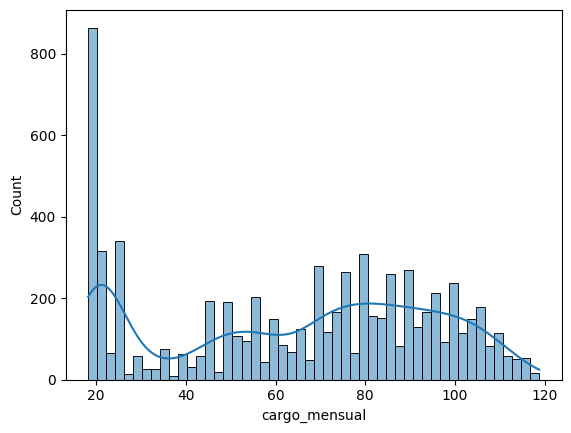

In [48]:
sns.histplot(df_encoded['cargo_mensual'], bins=50, kde=True)

In [49]:
px.box(df_encoded, x='cargo_mensual')

In [50]:
from scipy.stats import iqr
iqr_td = iqr(df_encoded['total_dia'])
iqr_td

np.float64(1.8024999999999998)

<Axes: xlabel='total_dia', ylabel='Count'>

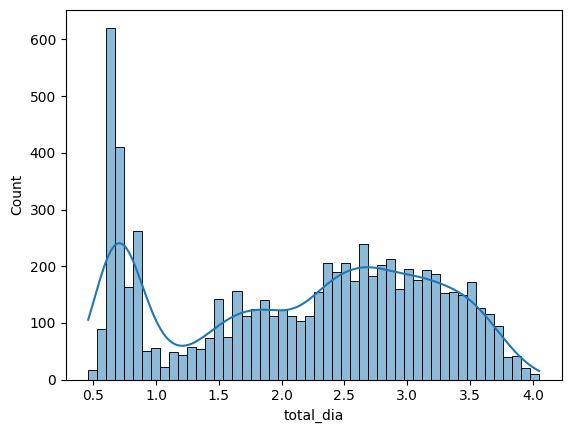

In [51]:
sns.histplot(df_encoded['total_dia'], bins=50, kde=True)

##2.5.2. Análisis de correlación aplicado al método VIF:
Mediante este análisis se busca comprender cuales de nuestras variables que presentan multicolinealidad afecta a las demás. Una vez detectadas mediante la matiz de calor, se retirarán del conjunto de datos.

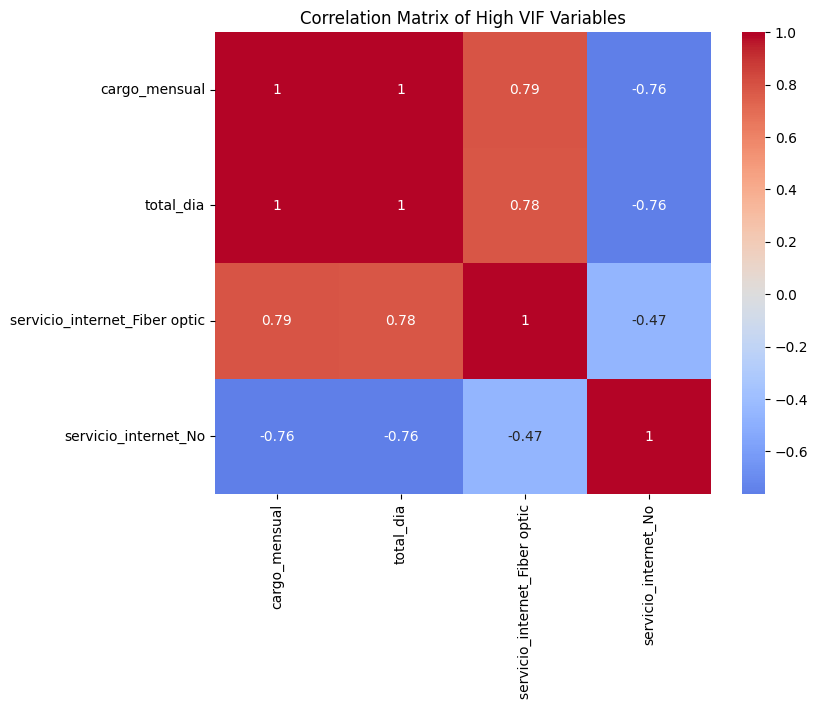

In [52]:
# Elegir las variables con alta multicolinealidad VIF
high_vif_cols = ['cargo_mensual', 'total_dia', 'servicio_internet_Fiber optic', 'servicio_internet_No']

# Create a correlation matrix for these variables
high_vif_corr = df_encoded[high_vif_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(high_vif_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of High VIF Variables')
plt.show()

In [53]:
# Eliminar columnas con alta correlación
X_reduced = df_encoded.drop(['cancelacion_Yes', 'cargo_mensual', 'total_dia'], axis=1)

X_reduced_const = add_constant(X_reduced)

X_reduced_const = X_reduced_const.astype(float)

# Calcular la VIF para el conjunto de variables reducidas
vif_data_reduced = pd.DataFrame()
vif_data_reduced['feature'] = X_reduced_const.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced_const.values, i) for i in range(X_reduced_const.shape[1])]

# Mostrar VIFs
display(vif_data_reduced.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,17.969444
2,cargo_total,10.781958
1,antiguedad_meses,7.572242
10,servicio_internet_No,2.752138
18,tipo_contrato_Two year,2.652316
9,servicio_internet_Fiber optic,2.398316
21,metodo_pago_Electronic check,1.975991
22,metodo_pago_Mailed check,1.856890
16,streaming_peliculas_Yes,1.738445
15,streaming_tv_Yes,1.723829


In [54]:
df_XR = pd.DataFrame(X_reduced)
df_XR.columns

Index(['antiguedad_meses', 'cargo_total', 'genero_Male', 'adulto_mayor_Yes',
       'tiene_pareja_Yes', 'tiene_dependientes_Yes',
       'lineas_multiples_No phone service', 'lineas_multiples_Yes',
       'servicio_internet_Fiber optic', 'servicio_internet_No',
       'seguridad_en_linea_Yes', 'respaldo_en_linea_Yes',
       'proteccion_dispositivo_Yes', 'soporte_tecnico_Yes', 'streaming_tv_Yes',
       'streaming_peliculas_Yes', 'tipo_contrato_One year',
       'tipo_contrato_Two year', 'facturacion_electronica_Yes',
       'metodo_pago_Credit card (automatic)', 'metodo_pago_Electronic check',
       'metodo_pago_Mailed check'],
      dtype='object')

In [55]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   antiguedad_meses                     7032 non-null   int64  
 1   cargo_total                          7032 non-null   float64
 2   genero_Male                          7032 non-null   bool   
 3   adulto_mayor_Yes                     7032 non-null   bool   
 4   tiene_pareja_Yes                     7032 non-null   bool   
 5   tiene_dependientes_Yes               7032 non-null   bool   
 6   lineas_multiples_No phone service    7032 non-null   bool   
 7   lineas_multiples_Yes                 7032 non-null   bool   
 8   servicio_internet_Fiber optic        7032 non-null   bool   
 9   servicio_internet_No                 7032 non-null   bool   
 10  seguridad_en_linea_Yes               7032 non-null   bool   
 11  respaldo_en_linea_Yes              

#3. Separación de los conjuntos de entrenamiento y de prueba

Dado que en el conjunto de datos hay valores numéricos con magnitudades distintas, la estandarización de estos es un paso importante para continuar con el entrenamiento.

Se tuvo que realizar dos veces la estandarización de las variables numéricas. Este paso se debió a que se observo desde el inicio que las varaiables numéricas tenían magnitudes distintas lo que durante el entrenamiento sería una dificultad para la precisión de los modelos.

La primera vuelta de la estandarización nos produjo una nueva dficultad ya que al aplicar el método concat, el índice del df no se ajusto y esto produjo valores NaN. En la segunda vuelta de la estadarización se corrigió este error

##3.1. Estandarización de los datos (primera vuelta):

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
#Separación de las variables numércias de las categóricas
X_num = X_reduced.select_dtypes(include=['float64', 'int64'])
X_cat = X_reduced.drop(columns=['cargo_total','antiguedad_meses'])

#Escalado de las variables numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

#Visualizar la variable de datos estandarizados
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)
X_num_scaled_df.head()

X = pd.concat((X_num_scaled_df, X_cat), axis=1)
X

,antiguedad_meses,cargo_total,genero_Male,adulto_mayor_Yes,tiene_pareja_Yes,tiene_dependientes_Yes,lineas_multiples_No phone service,lineas_multiples_Yes,servicio_internet_Fiber optic,servicio_internet_No,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,-0.954296,-0.745607,False,False,True,True,False,False,False,False,...,False,True,True,False,True,False,True,False,False,True
1,-0.954296,-0.768063,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,-1.158016,-0.883456,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,-0.791321,-0.461240,True,True,True,False,False,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,-1.198760,-0.889390,False,True,True,False,False,False,True,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,NaN,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
7039,NaN,NaN,True,False,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
7040,NaN,NaN,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
7041,NaN,NaN,True,False,True,True,False,False,False,False,...,True,True,False,True,False,True,False,False,False,True


In [58]:
datos.isna().sum()

,0
cancelacion,0
genero,0
adulto_mayor,0
tiene_pareja,0
tiene_dependientes,0
antiguedad_meses,0
lineas_multiples,0
servicio_internet,0
seguridad_en_linea,0
respaldo_en_linea,0


##3.2. Estandarización de los datos (segunda vuelta):

Nota:
La aplicación de la estandarización generó valores NaN en las variables numéricas. Por ello, hay que hacer una imputación de valores nulos.

Las causas de este suceso peden ser las siguientes:

🔍 Posibles causas de NaN tras estandarización
1. Valores faltantes ya presentes en los datos originales
Si X_num ya tenía NaN, StandardScaler no los elimina ni los transforma: simplemente los deja pasar, y el resultado sigue teniendo NaN.
2. Errores en la conversión de tipos
Si alguna columna numérica tiene valores tipo string (por ejemplo, ' ' o 'None'), al convertirla a float64 puede generar NaN.
3. Operaciones previas que generaron NaN
Si hiciste alguna transformación como división por cero, logaritmos de cero o negativos, o conversiones mal aplicadas, eso puede haber introducido NaN.
4. Index misalignment al combinar DataFrames
Si usaste np.concatenate() o pd.concat() sin alinear bien los índices, podrías haber generado filas incompletas que se llenan con NaN


In [59]:
from sklearn.impute import SimpleImputer
#Separación de las variables numércias de las categóricas
X_num = X_reduced.select_dtypes(include=['float64', 'int64'])
X_cat = X_reduced.drop(columns=['cargo_total','antiguedad_meses'])

#Imputación de valores vacíos en las variables numéricas
imputer = SimpleImputer(strategy='mean')
X_num_array = imputer.fit_transform(X_num)

#Recontrucción del DataFrame X_num
num_cols = X_reduced.select_dtypes(include=['float64', 'int64']).columns
X_num = pd.DataFrame(X_num_array, columns=num_cols, index=X_reduced.index)

#Escalado de las variables numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)
X_num_scaled_df

X = pd.concat([X_num_scaled_df.reset_index(drop=True), X_cat.reset_index(drop=True)], axis=1)
X


,antiguedad_meses,cargo_total,genero_Male,adulto_mayor_Yes,tiene_pareja_Yes,tiene_dependientes_Yes,lineas_multiples_No phone service,lineas_multiples_Yes,servicio_internet_Fiber optic,servicio_internet_No,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,-0.954296,-0.745607,False,False,True,True,False,False,False,False,...,False,True,True,False,True,False,True,False,False,True
1,-0.954296,-0.768063,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,-1.158016,-0.883456,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,-0.791321,-0.461240,True,True,True,False,False,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,-1.198760,-0.889390,False,True,True,False,False,False,True,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.791321,-0.679605,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
7028,-0.424625,-0.180711,True,False,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
7029,-1.239504,-0.966443,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
7030,1.408853,1.034298,True,False,True,True,False,False,False,False,...,True,True,False,True,False,True,False,False,False,True


<Axes: xlabel='antiguedad_meses', ylabel='Count'>

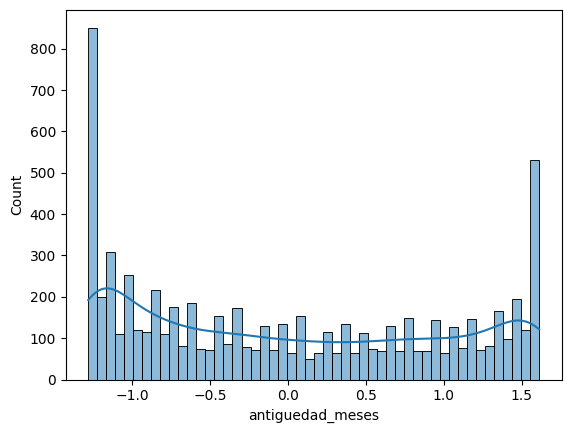

In [60]:
sns.histplot(X['antiguedad_meses'], bins=50, kde=True)

<Axes: xlabel='cargo_total', ylabel='Count'>

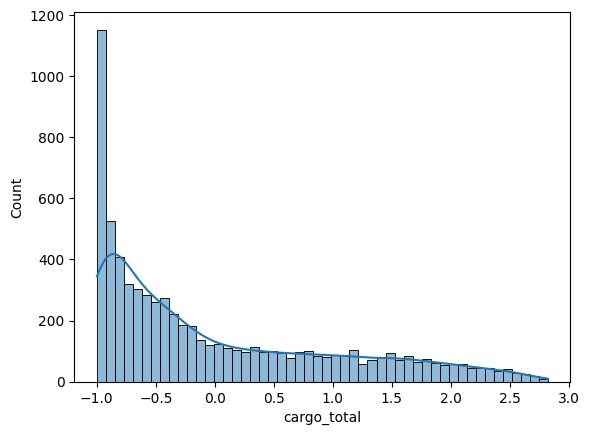

In [61]:
sns.histplot(X['cargo_total'], bins=50, kde=True)

##3.3. Separación de los datos de entrenamiento y de prueba

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, df_encoded['cancelacion_Yes'], stratify= df_encoded['cancelacion_Yes'], random_state=42)

In [63]:
#Al aplicar el parámetro stratify garantizamos que la distribución de los datos en los conjuntos de datos sea la misma
print("Distribución en y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en y_test:")
print(y_test.value_counts(normalize=True))

Distribución en y_train:
cancelacion_Yes
False    0.734168
True     0.265832
Name: proportion, dtype: float64

Distribución en y_test:
cancelacion_Yes
False    0.734357
True     0.265643
Name: proportion, dtype: float64


#4. Entrenamiento de los modelos

##4.1. Modelo BaseLine:
Es un modelo simple, rápido y sin ajustes que sirve como punto de comparación. No busca ser el mejor, sino establecer un estándar mínimo: “si no superas esto, algo está mal”.

---
Interpretación de los resultados del modelo base:

🔍 Interpretación clave
✅ Clase False (no canceló):
- El modelo predice bien esta clase.
- Tiene recall de 1.00, lo que significa que detecta todos los casos negativos.
- Pero su precision de 0.73 indica que algunas predicciones negativas son incorrectas.
❌ Clase True (sí canceló):
- El modelo no detecta ni un solo caso positivo.
- Precision, recall y F1-score son 0.00, lo que significa que nunca predice esta clase


In [64]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

print(classification_report(y_test, y_dummy))



              precision    recall  f1-score   support

       False       0.73      1.00      0.85      1291
        True       0.00      0.00      0.00       467

    accuracy                           0.73      1758
   macro avg       0.37      0.50      0.42      1758
weighted avg       0.54      0.73      0.62      1758



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##4.2. Pipeline: RandomForestClassifier

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix


pipe_rf = Pipeline([
    ('rf', RandomForestClassifier(
        class_weight='balanced',  # Para manejar desbalance
        n_estimators=100,
        max_depth=None,
        random_state=42
    ))
])


#Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='f1_macro')

print("F1 Macro promedio (CV):", scores.mean())


F1 Macro promedio (CV): 0.6976652157506698


In [88]:
pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

matriz_confusion_rf1 = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1291
        True       0.61      0.46      0.53       467

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758

Matriz de confusión:
[[1154  137]
 [ 250  217]]


In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

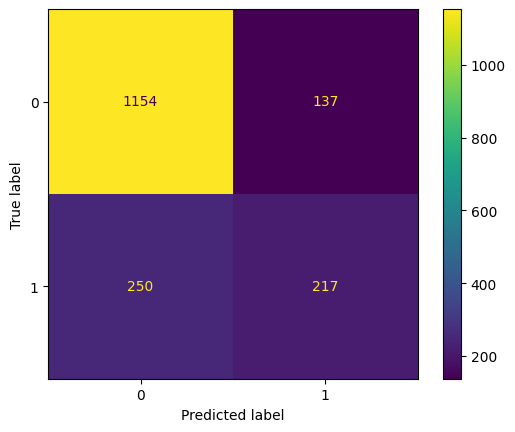

In [89]:
visaulizacion = ConfusionMatrixDisplay( confusion_matrix = matriz_confusion_rf1)
visaulizacion.plot();

##4.3. RandomForestClassifier con ajuste de hiperparámetros


In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 3],
    'rf__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor F1 Macro:", grid_search.best_score_)

Mejores parámetros: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Mejor F1 Macro: 0.7418257161291141


In [90]:
best_rf = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

matriz_confusion_rf2 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.77      0.83      1291
        True       0.54      0.75      0.63       467

    accuracy                           0.76      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.76      0.77      1758

[[996 295]
 [119 348]]


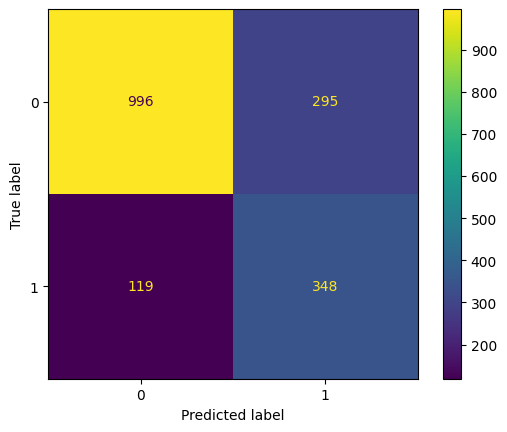

In [91]:
visaulizacion = ConfusionMatrixDisplay( confusion_matrix = matriz_confusion_rf2)
visaulizacion.plot();

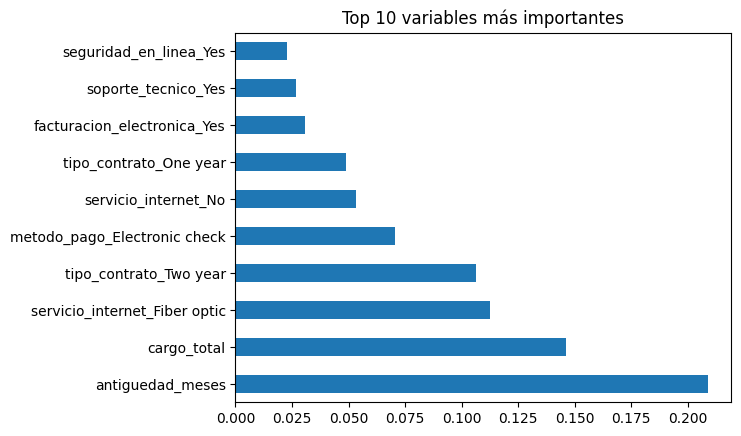

In [69]:
importancia = pd.Series(best_rf.feature_importances_, index=X.columns)
importancia.nlargest(10).plot(kind='barh')
plt.title("Top 10 variables más importantes")
plt.show()

##4.4 Modelo K-Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

#Pipeline básico para KNN
pipe_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='f1_macro', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Mejores parámetros:", grid_knn.best_params_)
print("Mejor F1 Macro:", grid_knn.best_score_)



Mejores parámetros: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Mejor F1 Macro: 0.7165038288959337


In [94]:
y_pred_knn = grid_knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.83      0.86      0.84      1291
        True       0.57      0.52      0.54       467

    accuracy                           0.77      1758
   macro avg       0.70      0.69      0.69      1758
weighted avg       0.76      0.77      0.76      1758

[[1109  182]
 [ 226  241]]


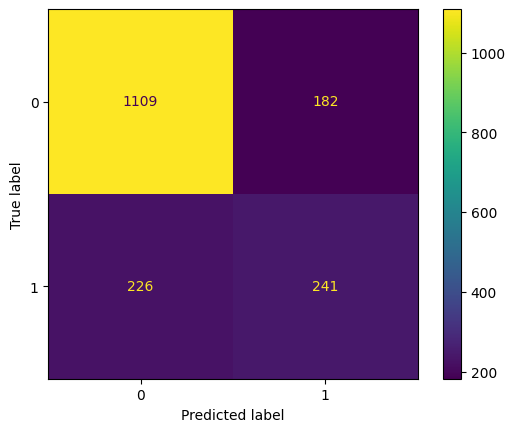

In [95]:
visaulizacion = ConfusionMatrixDisplay( confusion_matrix = matriz_confusion_knn)
visaulizacion.plot();

In [73]:
from imblearn.over_sampling import SMOTE


# Pipeline with SMOTE before the model
pipe_smote_knn = Pipeline([
    ('knn', KNeighborsClassifier()) # Removed SMOTE from the pipeline
])

# Grid of hyperparameters
param_grid_smote_knn = {
    'knn__n_neighbors': [5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# GridSearch with cross-validation
grid_smote_knn = GridSearchCV(
    pipe_smote_knn,
    param_grid=param_grid_smote_knn,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

# Training
grid_smote_knn.fit(X_train_smote, y_train_smote)

# Results
print("Mejores parámetros:", grid_smote_knn.best_params_)
print("Mejor F1 Macro:", grid_smote_knn.best_score_)

Mejores parámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Mejor F1 Macro: 0.8184474078861628


In [97]:
y_pred_knn = grid_smote_knn.predict(X_test)

matriz_confusion_knn2 = confusion_matrix(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.85      0.71      0.78      1291
        True       0.46      0.66      0.54       467

    accuracy                           0.70      1758
   macro avg       0.66      0.69      0.66      1758
weighted avg       0.75      0.70      0.72      1758

[[922 369]
 [157 310]]


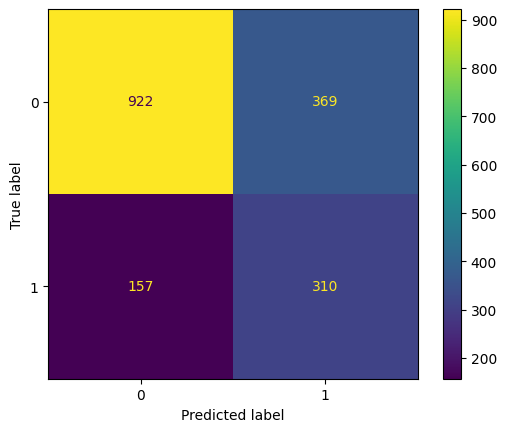

In [98]:
visaulizacion = ConfusionMatrixDisplay( confusion_matrix = matriz_confusion_knn2)
visaulizacion.plot();

#**Referencias de código para apoyo.**
En este apartado se documentan los scripts de algunas lecciones vistas durante las lecciones y algunas obtenidas de IA generativa.

Construcción de un Pipeline en Sklearn: Es una estructura que encadena pasos de procesamiento y modelado, como si fuera una línea de ensamblaje. No necesitas declarar funciones manualmente, solo defines los pasos y el orden.


```
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

```



Código de referencia para agrupar en dos categorías:

```Python
# para crear uno nuevo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded
```



Código de referencia para: comparar proporciones por clase objetivo

```Python
pd.crosstab(df['cancelacion'], [df['genero'], df['tiene_pareja']])
```



Código de referencia para vsaulización de datos por barras agrupadas


```Python
px.histogram(datos,x='estado_civil',text_auto=True,color='adherencia_inversion',barmode='group')
```



Código de referencia para vsaulización de datos.



```Python
sns.countplot(data=datos,x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()
```

